# Animation of aliasing and demonstration of the Nyquist frequency

M Kenworthy // Leiden Observatory // kenworthy@strw.leidenuniv.nl

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c
from astropy import units as u

from hcipy import *

from progressbar import progressbar 

from matplotlib import animation, rc

anim_version = 'v1'

from scenes import *


Text(0.5, 0, 'Pixels')

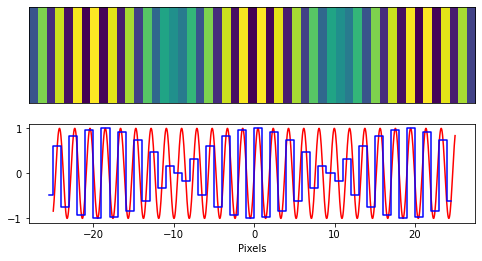

In [27]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,4))

nx = 51
ny = 11
(y,x) = np.mgrid[0:ny,0:nx]
y = y - ny/2.
x = x - nx/2.

period = 1.9 # period in pixels
fine_x = np.linspace(-25,25,1001)
sine = np.sin(2*np.pi*x/period)
ax1.imshow(sine)
ax2.plot(fine_x, np.sin(2*np.pi*fine_x/period),color='red')

ax2.step(x[0], sine[0], where='mid', label='mid',color='blue')

ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])

ax2.set_xlabel('Pixels')


In [ ]:
periodic = Stage()
periodic.add(Act(3.5, 1.2, 5,'sig',10))
periodic.add(Act(1.2, 3.5, 5,'sig',10))
#periodic.add(Act(0.7, 4.0, 5,'sig',5))
#periodic.add(Act(4.0, 4.0, 2, 'sig',1))



total_time_animation = periodic.total_time() # seconds
frame_rate = 20          # frames per second
total_frames = total_time_animation * frame_rate # seconds

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,4))

anim = FFMpegWriter('nyquist_sampling_{}.mp4'.format(anim_version), framerate=frame_rate)


times = np.arange(0,total_time_animation, 1./frame_rate)

per = periodic.t(times)
nx = 51
ny = 11
(y,x) = np.mgrid[0:ny,0:nx]
y = y - ny/2.
x = x - nx/2.
fine_x = np.linspace(-25,25,1001)


for t in progressbar(range(np.int(total_frames))):
    ax1.clear()
    ax2.clear()
    period = per[t] # period in pixels
    sine = np.sin(2*np.pi*x/period)
    ax1.imshow(sine)
    ax2.plot(fine_x, np.sin(2*np.pi*fine_x/period),color='red')

    ax2.step(x[0], sine[0], where='mid', label='mid',color='blue')

    ax1.axes.get_xaxis().set_ticks([])
    ax1.axes.get_yaxis().set_ticks([])

    ax2.set_xlabel('Pixels')
    ax2.set_xlim(np.min(fine_x)-1,np.max(fine_x))

    ax1.text(0.95,0.05,"@mattkenworthy", fontsize=12, color='white',
    horizontalalignment='right', verticalalignment='bottom',
    transform=ax1.transAxes)

    ax1.text(0.05,0.05, anim_version, fontsize=20, color='white',
    horizontalalignment='left', verticalalignment='bottom',
    transform=ax1.transAxes)
    
    ax1.set_title('period={:.2f} pix'.format(period),fontsize=20)
    
    anim.add_frame()

plt.close()
anim.close()

# Show created animation
anim

In [30]:
!ffmpeg -i nyquist_sampling_v1.mp4 -vf "fps=10,scale=400:-1:flags=lanczos" -c:v pam -f image2pipe - | convert -delay 10 - -loop 0 -layers optimize nyquist_sampling_v1.gif

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with Apple clang version 11.0.3 (clang-1103.0.32.62)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.3.1_1 --enable-shared --enable-pthreads --enable-version3 --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librtmp --enable-libspeex --enable-libsoxr --enable-videotoolbox --disable-libjack --disable-indev=jack
  libavutil      56. 51.100 /